# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [5]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [7]:
data = pd.read_csv('Customer_data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [8]:
df2 = data.filter(['ID','Age'], axis=1)
df2.head()

,ID,Age
0,100000001,67
1,100000002,22
2,100000003,49
3,100000004,45
4,100000005,53


In [9]:
cluster_data = data[['ID','Age']].copy(deep=True)
cluster_array = np.array(cluster_data)
cluster_array

array([[100000001,        67],
       [100000002,        22],
       [100000003,        49],
       ...,
       [100001998,        31],
       [100001999,        24],
       [100002000,        25]], dtype=int64)

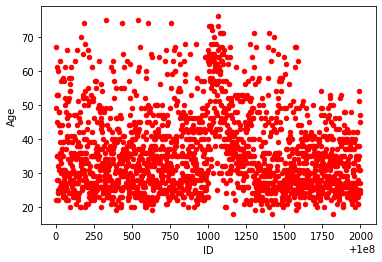

In [10]:
ax1 = data.plot.scatter(x='ID',y='Age', c= 'red')

In [11]:
cluster_data = data[['ID','Age']].copy(deep=True)
cluster_array = np.array(cluster_data)

In [12]:
import random
init_centroids = random.sample(range(0, max(cluster_data['Age'])), 3)
init_centroids

[25, 28, 8]

In [20]:
initial_centroids = []
for i in init_centroids:
    initial_centroids.append(cluster_data.loc[i])
initial_centroids

[ID     100000026
 Age           36
 Name: 25, dtype: int64, ID     100000029
 Age           34
 Name: 28, dtype: int64, ID     100000009
 Age           61
 Name: 8, dtype: int64]

In [22]:
initial_centroids = np.array(initial_centroids)
initial_centroids

array([[100000026,        36],
       [100000029,        34],
       [100000009,        61]], dtype=int64)

In [23]:
def calc_distance(X1, X2):
    return np.sqrt(sum(np.square(X1-X2)))

In [24]:
#test
calc_distance(initial_centroids[0], cluster_array[1])

27.784887978899608

In [25]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    for i in np.arange(idx.size):
        
        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
            
        idx[i] = np.argmin(J)
    
    
    return idx

In [26]:
#test
findClosestCentroids(cluster_array, initial_centroids)

array([2, 0, 2, ..., 1, 1, 1])

In [27]:
#test
idx = findClosestCentroids(cluster_array, initial_centroids)
print("centroids")
print(initial_centroids)
for i in range(len(cluster_array[:10])):
    print("centroid ", idx[i], "assigned to ")
    print(cluster_array[i])
#print(idx[:60])


centroids
[[100000026        36]
 [100000029        34]
 [100000009        61]]
centroid  2 assigned to 
[100000001        67]
centroid  0 assigned to 
[100000002        22]
centroid  2 assigned to 
[100000003        49]
centroid  2 assigned to 
[100000004        45]
centroid  2 assigned to 
[100000005        53]
centroid  0 assigned to 
[100000006        35]
centroid  2 assigned to 
[100000007        53]
centroid  0 assigned to 
[100000008        35]
centroid  2 assigned to 
[100000009        61]
centroid  0 assigned to 
[100000010        28]


In [28]:
#cluster_array, centroids,clusters= 3
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in np.arange(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
    
    return centroids

In [29]:
centroids = computeCentroids(cluster_array, idx, 3)
print('Centroids computed after initial finding of closest centroids:')
print(np.round(centroids,2))

# correct until this point

Centroids computed after initial finding of closest centroids:
[[1.00000018e+08 3.54500000e+01]
 [1.00001015e+08 3.58200000e+01]
 [1.00000010e+08 5.60000000e+01]]


In [44]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'br'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

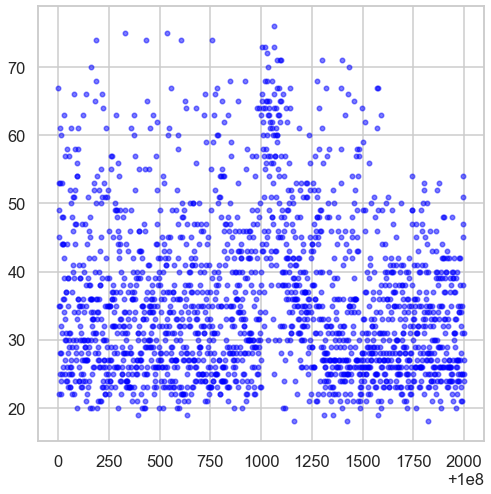

In [49]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(cluster_array)

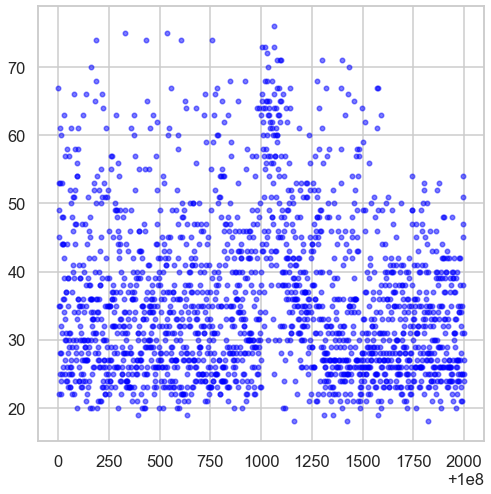

In [50]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(cluster_array
               )

In [33]:
#K = 3
#import utils as pip
#import pip
#pip.main(['install', 'requests'])
#max_iters = 10

#centroids, idx, anim = pip.runkMeans(X, initial_centroids,
                                       #findClosestCentroids, computeCentroids, max_iters, True)
#anim

In [34]:
# showing clusters


def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()


In [43]:
def k_means(k, X):
    cg_prev = initial_centroids
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster =findClosestCentroids(cluster_array, initial_centroids)
        idx = findClosestCentroids(cluster_array, initial_centroids)
        show_clusters(X, cluster, cg_prev)
        cg_new = computeCentroids(X, idx, k):
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(3, cluster_array)


SyntaxError: invalid syntax (<ipython-input-43-5255e71ac541>, line 9)

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [12]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
       # write your your loop 
    
    return [ Final_Cluster_Distance , Cluster_Metric ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

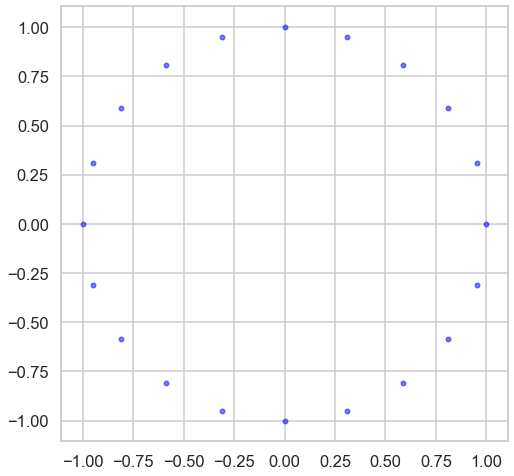

In [5]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

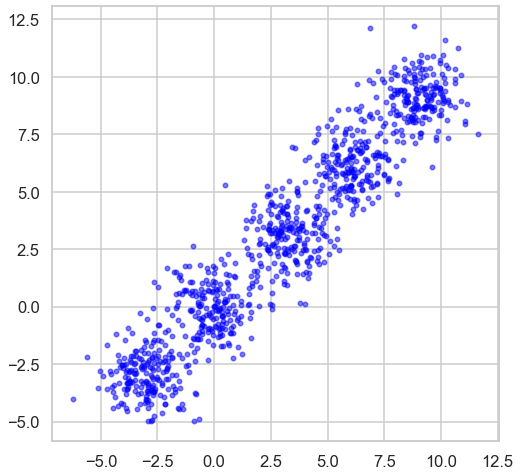

In [6]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

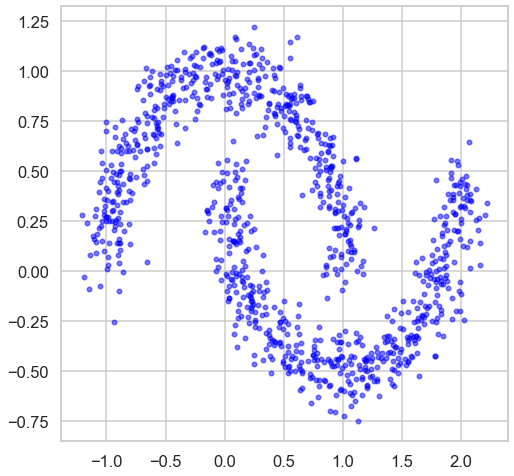

In [18]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 